In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/ERA-V1/Assignments/S8

Mounted at /content/drive
/content/drive/MyDrive/GitHub/ERA-V1/Assignments/S8


# Import Libraries

In [2]:
!pip install torchsummary
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Statistics

In [3]:
from get_stat import get_stat
get_stat()

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


## Data Transformations



In [4]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))
                                       ])


# Dataset and Creating Train/Test Split

In [5]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The model

In [7]:
from model import S8Model1 as Net

CUDA Available? True


# Model Params

In [8]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='bn').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
           Dropout-3           [-1, 16, 32, 32]               0
       BatchNorm2d-4           [-1, 16, 32, 32]              32
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
           Dropout-7           [-1, 16, 32, 32]               0
       BatchNorm2d-8           [-1, 16, 32, 32]              32
            Conv2d-9            [-1, 8, 32, 32]             128
             ReLU-10            [-1, 8, 32, 32]               0
          Dropout-11            [-1, 8, 32, 32]               0
      BatchNorm2d-12            [-1, 8, 32, 32]              16
        MaxPool2d-13            [-1, 8, 16, 16]               0
           Conv2d-14           [-1

# Training and Testing



# Let's Train and test our model

In [9]:
from utils import train, test, plot_graph, show_incorrect_images

In [10]:
model = Net(norm='bn').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 20
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, threshold=1e-2, verbose=True, factor=0.5)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test_loss = test(model, device, test_loader, criterion)
  scheduler.step(test_loss)

Epoch 1


Train: Loss=1.1963 Batch_id=390 Accuracy=41.20: 100%|██████████| 391/391 [00:18<00:00, 21.56it/s]


Test set: Average loss: 0.0106, Accuracy: 5011/10000 (50.11%)

Epoch 2


Train: Loss=1.3239 Batch_id=390 Accuracy=55.26: 100%|██████████| 391/391 [00:17<00:00, 22.34it/s]


Test set: Average loss: 0.0090, Accuracy: 5859/10000 (58.59%)

Epoch 3


Train: Loss=1.0110 Batch_id=390 Accuracy=59.66: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]


Test set: Average loss: 0.0083, Accuracy: 6178/10000 (61.78%)

Epoch 4


Train: Loss=1.0390 Batch_id=390 Accuracy=62.54: 100%|██████████| 391/391 [00:17<00:00, 22.50it/s]


Test set: Average loss: 0.0082, Accuracy: 6253/10000 (62.53%)

Epoch 5


Train: Loss=0.8530 Batch_id=390 Accuracy=64.70: 100%|██████████| 391/391 [00:17<00:00, 21.78it/s]


Test set: Average loss: 0.0081, Accuracy: 6277/10000 (62.77%)

Epoch 6


Train: Loss=0.8171 Batch_id=390 Accuracy=65.89: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]


Test set: Average loss: 0.0075, Accuracy: 6599/10000 (65.99%)

Epoch 7


Train: Loss=0.9310 Batch_id=390 Accuracy=67.15: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]


Test set: Average loss: 0.0074, Accuracy: 6641/10000 (66.41%)

Epoch 8


Train: Loss=1.0717 Batch_id=390 Accuracy=67.86: 100%|██████████| 391/391 [00:18<00:00, 21.62it/s]


Test set: Average loss: 0.0073, Accuracy: 6684/10000 (66.84%)

Epoch 9


Train: Loss=0.9282 Batch_id=390 Accuracy=68.51: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]


Test set: Average loss: 0.0072, Accuracy: 6723/10000 (67.23%)

Epoch 10


Train: Loss=0.6665 Batch_id=390 Accuracy=69.35: 100%|██████████| 391/391 [00:17<00:00, 22.45it/s]


Test set: Average loss: 0.0072, Accuracy: 6749/10000 (67.49%)

Epoch 11


Train: Loss=0.9281 Batch_id=390 Accuracy=69.97: 100%|██████████| 391/391 [00:18<00:00, 20.63it/s]


Test set: Average loss: 0.0070, Accuracy: 6795/10000 (67.95%)

Epoch 12


Train: Loss=0.7682 Batch_id=390 Accuracy=70.33: 100%|██████████| 391/391 [00:17<00:00, 22.02it/s]


Test set: Average loss: 0.0070, Accuracy: 6853/10000 (68.53%)

Epoch 13


Train: Loss=0.6644 Batch_id=390 Accuracy=70.86: 100%|██████████| 391/391 [00:17<00:00, 21.87it/s]


Test set: Average loss: 0.0069, Accuracy: 6909/10000 (69.09%)

Epoch 14


Train: Loss=0.7264 Batch_id=390 Accuracy=71.19: 100%|██████████| 391/391 [00:17<00:00, 22.13it/s]


Test set: Average loss: 0.0069, Accuracy: 6885/10000 (68.85%)

Epoch 15


Train: Loss=0.8299 Batch_id=390 Accuracy=71.53: 100%|██████████| 391/391 [00:17<00:00, 22.16it/s]


Test set: Average loss: 0.0069, Accuracy: 6868/10000 (68.68%)

Epoch 00015: reducing learning rate of group 0 to 5.0000e-03.
Epoch 16


Train: Loss=0.7335 Batch_id=390 Accuracy=73.15: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]


Test set: Average loss: 0.0066, Accuracy: 7034/10000 (70.34%)

Epoch 17


Train: Loss=0.6697 Batch_id=390 Accuracy=73.36: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]


Test set: Average loss: 0.0064, Accuracy: 7044/10000 (70.44%)

Epoch 18


Train: Loss=0.7431 Batch_id=390 Accuracy=73.91: 100%|██████████| 391/391 [00:18<00:00, 21.55it/s]


Test set: Average loss: 0.0063, Accuracy: 7158/10000 (71.58%)

Epoch 19


Train: Loss=0.7543 Batch_id=390 Accuracy=73.70: 100%|██████████| 391/391 [00:17<00:00, 22.47it/s]


Test set: Average loss: 0.0065, Accuracy: 7115/10000 (71.15%)

Epoch 20


Train: Loss=0.9132 Batch_id=390 Accuracy=74.04: 100%|██████████| 391/391 [00:18<00:00, 21.08it/s]


Test set: Average loss: 0.0065, Accuracy: 7103/10000 (71.03%)

Epoch 00020: reducing learning rate of group 0 to 2.5000e-03.


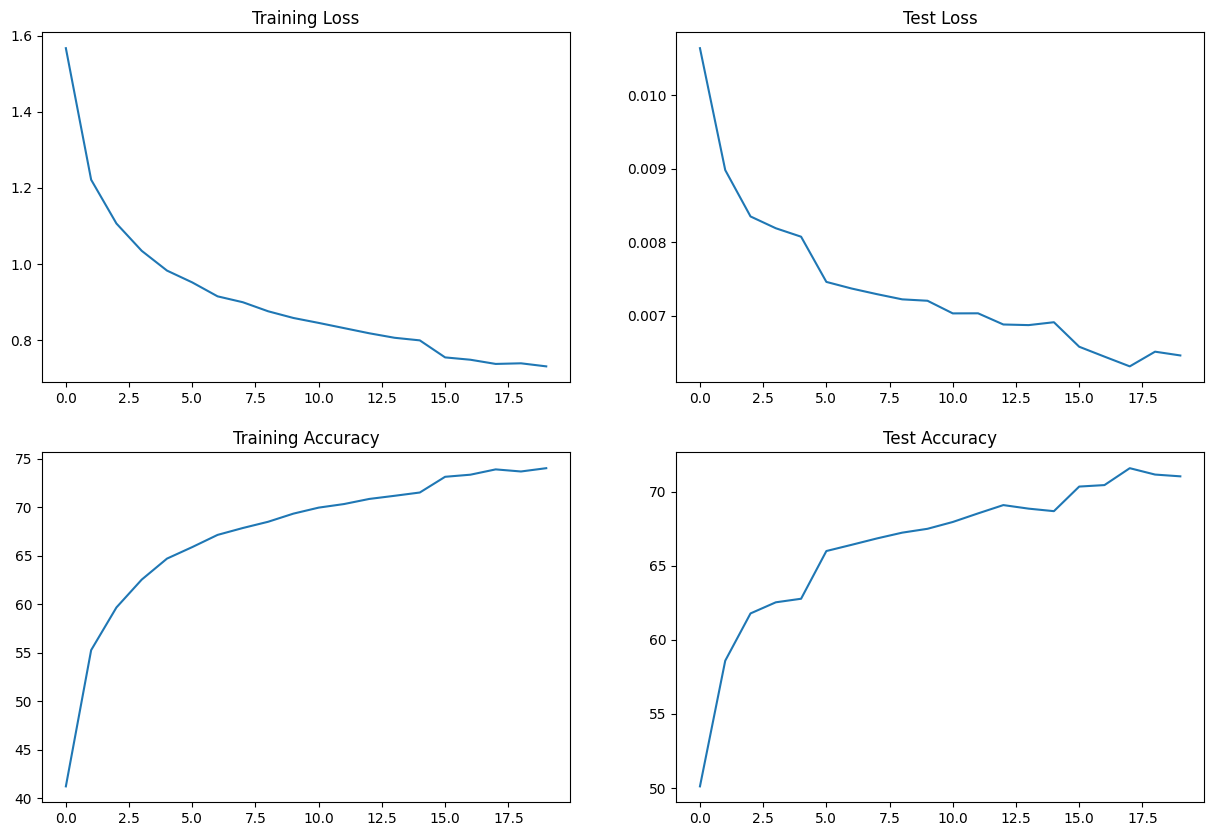

In [11]:
plot_graph()

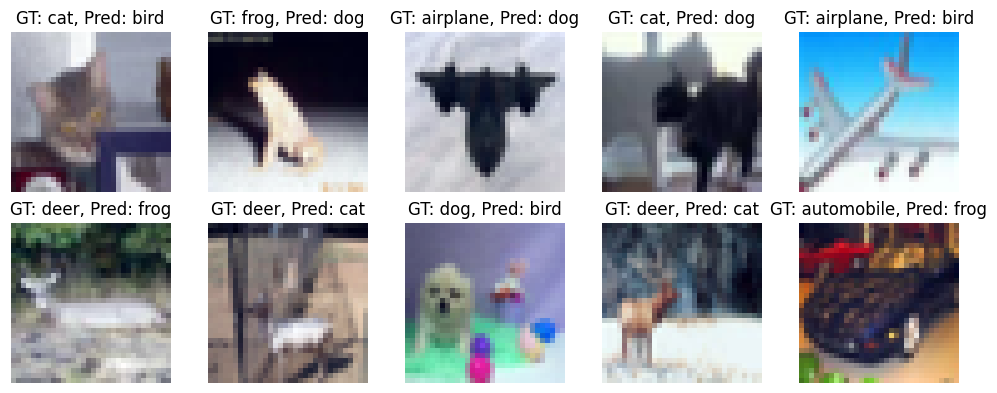

In [12]:
show_incorrect_images()